In [221]:
#Titanic problem
#data from Kaggle
#Logistic Regression

In [222]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [223]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [224]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [225]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


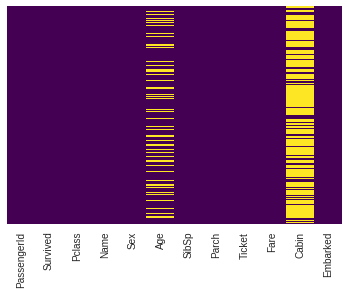

In [226]:
#how much data is missing
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

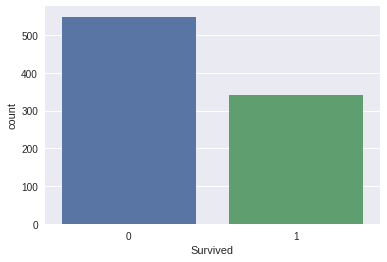

In [227]:
#how many survived...
sns.countplot(x='Survived',data=train)

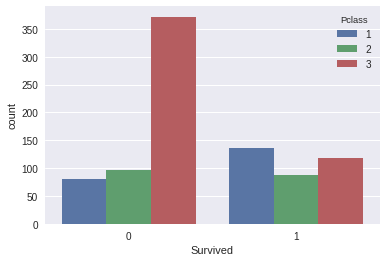

In [228]:
#In what passenger class, more people survived
sns.countplot(x='Survived',hue='Pclass', data=train)

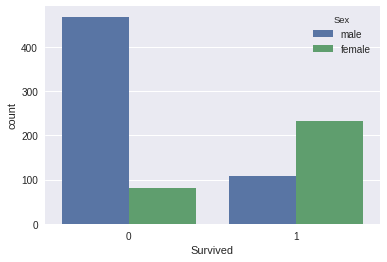

In [229]:
#let's see if more women or more men survived?
sns.countplot(x='Survived',hue='Sex', data=train)

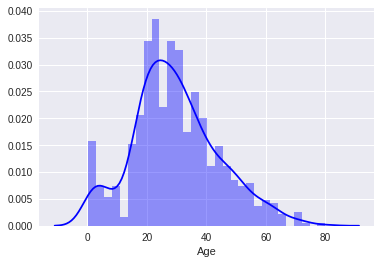

In [230]:
sns.distplot(train['Age'].dropna(),bins=30, color='blue')

In [231]:
#i just drop the following features for now, but one can impute them somehow
#and improve predictions....but for now let's just drop them!
train.drop(['Sex','Embarked','Name','Ticket', 'Cabin', "Age"],axis=1,inplace=True)

In [232]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [233]:
from sklearn.cross_validation import train_test_split

In [234]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)#, random_state=101)
X_train.head()


,PassengerId,Pclass,SibSp,Parch,Fare
626,627,2,0,0,12.3500
653,654,3,0,0,7.8292
444,445,3,0,0,8.1125
420,421,3,0,0,7.8958
521,522,3,0,0,7.8958


In [235]:
from sklearn.linear_model import LogisticRegression

In [236]:
logmodel = LogisticRegression()

In [237]:
#training our logistic regression model
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [238]:
predictions = logmodel.predict(X_test)

In [239]:
from sklearn.metrics import classification_report

In [240]:
#model evaluation
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.76      0.84      0.80       176
          1       0.61      0.50      0.55        92

avg / total       0.71      0.72      0.71       268



In [241]:
from sklearn.metrics import confusion_matrix

In [242]:
confusion_matrix(y_test,predictions)

array([[147,  29],
       [ 46,  46]])

In [ ]:
#I could also try the test set...
#using the dropped columns can improve the result